In [25]:
!pip install imblearn

     |████████████████████████████████| 199 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 10.7 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [1]:
import matplotlib
import matplotlib.patches as mpatches

In [2]:
import pandas as pd
from pandas import set_option
import matplotlib
import numpy as np 
from matplotlib.font_manager import FontProperties
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# Data Processing

# Feature Analysis: Analyse la base de donnée 

In [5]:
df = pd.read_excel("default of credit card clients.xls")

In [6]:
df.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [7]:
df = df.rename(columns=df.iloc[0])

In [ ]:
df.count() if df([""])

In [8]:
df = df.iloc[1: , :]

Check les valeurs manquants pour cette BDD

In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
df.dtypes

ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [11]:
df = df.rename(columns = {"default payment next month": "Default"})

In [12]:
df['ID'] = pd.to_numeric(df['ID'])
df['LIMIT_BAL'] = pd.to_numeric(df['LIMIT_BAL'])
df['SEX'] = pd.to_numeric(df['SEX'])
df['EDUCATION'] = pd.to_numeric(df['EDUCATION'])
df['MARRIAGE'] = pd.to_numeric(df['MARRIAGE'])
df['AGE'] = pd.to_numeric(df['AGE'])
df['PAY_0'] = pd.to_numeric(df['PAY_0'])
df['PAY_2'] = pd.to_numeric(df['PAY_2'])
df['PAY_3'] = pd.to_numeric(df['PAY_3'])
df['PAY_4'] = pd.to_numeric(df['PAY_4'])
df['PAY_5'] = pd.to_numeric(df['PAY_5'])
df['PAY_6'] = pd.to_numeric(df['PAY_6'])
df['BILL_AMT1'] = pd.to_numeric(df['BILL_AMT1'])
df['BILL_AMT2'] = pd.to_numeric(df['BILL_AMT2'])
df['BILL_AMT3'] = pd.to_numeric(df['BILL_AMT3'])
df['BILL_AMT4'] = pd.to_numeric(df['BILL_AMT4'])
df['BILL_AMT5'] = pd.to_numeric(df['BILL_AMT5'])
df['BILL_AMT6'] = pd.to_numeric(df['BILL_AMT6'])
df['PAY_AMT1'] = pd.to_numeric(df['PAY_AMT1'])
df['PAY_AMT2'] = pd.to_numeric(df['PAY_AMT2'])
df['PAY_AMT3'] = pd.to_numeric(df['PAY_AMT3'])
df['PAY_AMT4'] = pd.to_numeric(df['PAY_AMT4'])
df['PAY_AMT5'] = pd.to_numeric(df['PAY_AMT5'])
df['PAY_AMT6'] = pd.to_numeric(df['PAY_AMT6'])
df['Default'] = pd.to_numeric(df['Default'])

In [13]:
df.drop('ID', axis = 1, inplace =True)

In [14]:
df.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

In [15]:
df["Default"] = df["Default"].astype('category')

In [199]:
df['Default'].value_counts()

0    22996
1     6605
Name: Default, dtype: int64

In [17]:
df = df.drop(df[df['MARRIAGE']==0].index)

pareil avec Education, les values 0 , 5 et 6 est undefine, donc que on va effacer ces values

In [18]:

df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)

In [19]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,...,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000
mean,167550.544914,1.603189,1.815479,1.555454,35.464072,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,...,4.680320e+04,43122.554204,40235.545184,38858.449816,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374
std,129944.020953,0.489244,0.710399,0.518092,9.213243,1.124503,1.199642,1.199793,1.172220,1.136217,...,6.912389e+04,64196.383913,60699.344884,59519.893043,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.652000e+03,2329.000000,1780.000000,1278.000000,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.003500e+04,19005.000000,18091.000000,17118.000000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.983000e+04,54271.000000,50072.000000,49121.000000,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [22]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Pour la variable Pay_n, on prends que les values suivants: -1,1,2,3,4,5,6,7,8,9

-1: full payment, no dette

donc que dans ce cas, on va regrouper la value - 2 et -1 dans un groupe - 1
 
* value 0 est undefine donc qu'on va ajouter 1 pour chaque value >= 0

In [23]:
for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']: 
    filter = (df[att] == -2) | (df[att] == -1) 
    df.loc[filter, att] = -1
    df[att] = df[att].astype('int64')
    filter = (df[att] >= 0)
    df.loc[filter, att] = df.loc[filter, att] + 1

On peut voir la descriptive statistique est changé 

In [24]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,0.794770,0.666329,0.638492,0.591939,0.550894,0.520759
std,1.339224,1.397190,1.389153,1.350751,1.309342,1.325013
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [25]:
if SHOW_FIGURE :
    subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']]
    f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
    f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
    ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
    ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
    ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
    ax4 = sns.countplot(x="PAY_1", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
    ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
    ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
    ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
    ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
    ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

## Unbalanced data

unbalanced data Here, it is evident that the default class appears in only 22%, which results in imbalance data. As described below, this issue can be addressed by imposing proportional weight loss, while fitting the model.


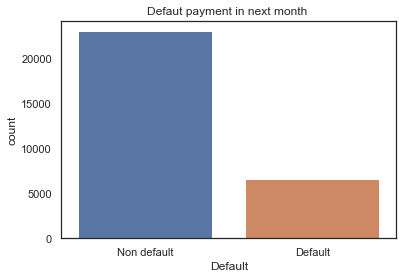

In [152]:
df["Default"].value_counts()
plt.title("Defaut payment in next month ")
ax1 = sns.countplot(x = "Default", data = df)
ax1.set_xticklabels(["Non default", "Default"])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='count'>

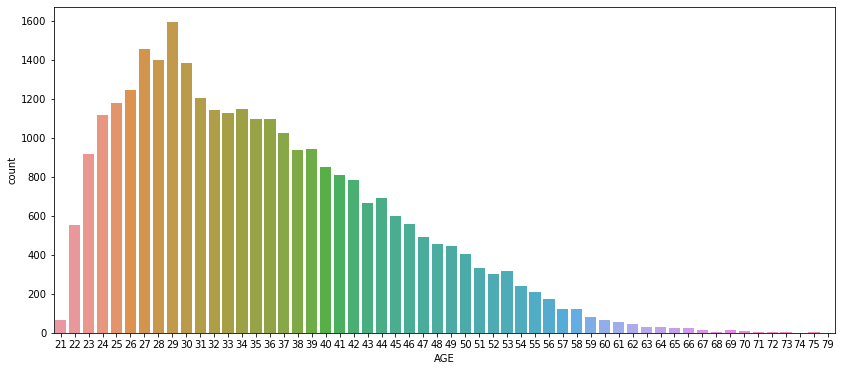

In [27]:
from matplotlib import pyplot
a4_dims = (14, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(df['AGE'],ax=ax)

Mtn, on va passer à nettoyer la variable BILL_n

In [267]:
if SHOW_FIGURE :
    fig, axes= plt.subplots(6,4, figsize=(12,12))
    non_def = df[df.Default==0]
    default = df[df.Default==1]
    ax = axes.ravel()

    for i,label in enumerate(df.columns[:-1]):
        _,bins = np.histogram(data[label],bins=100)
        ax[i].hist(non_def[label],bins=bins,color='r',alpha=.5)# red color for malignant class
        ax[i].hist(default[label],bins=bins,color='g',alpha=0.3)# alpha is for transparency in the overlapped region
        ax[i].set_title(df.columns[i],fontsize=9)
        ax[i].axes.get_xaxis().set_visible(True) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
        ax[i].set_yticks(())


    ax[0].legend(['Non Default','Default'],loc='best',fontsize=8)
    plt.tight_layout() # let's make good plots
    plt.show()

## Correlation matrice:

Un autre point pertinent susceptible d'affecter les performances de classification est la corrélation entre les caractéristiques : la présence de caractéristiques fortement corrélées peut entraîner une baisse des performances de certains algorithmes de classification qui supposent que les prédicteurs sont tous indépendants. Un autre avantage de la détection de la corrélation entre les caractéristiques est que la même information peut être codée avec moins d'attributs, ce qui peut conduire à des modèles finaux plus simples.

Plus la valeur absolue est élevée, plus la corrélation linéaire est forte, ce qui signifie qu'en moyenne, pour chaque grande valeur observée, une grande valeur correspondante est également observée.



il existe une forte corrélation positive entre les attributs BILL AMT (amount of bill statement de 9/2005 jusqu'à 4/2005) 

The Pearson’s correlation coefficient est p: 

p = 0.95 entre BILL_ATM1 et BILL_ATM2

p = 0.93 entre BILL_ATM2 et BILL_ATM3

p = 0.93 entre BILL_ATM3 et BILL_ATM4

p = 0.94 entre BILL_ATM4 et BILL_ATM5

p = 0.95 entre BILL_ATM5 et BILL_ATM6

/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_95680/2426999102.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


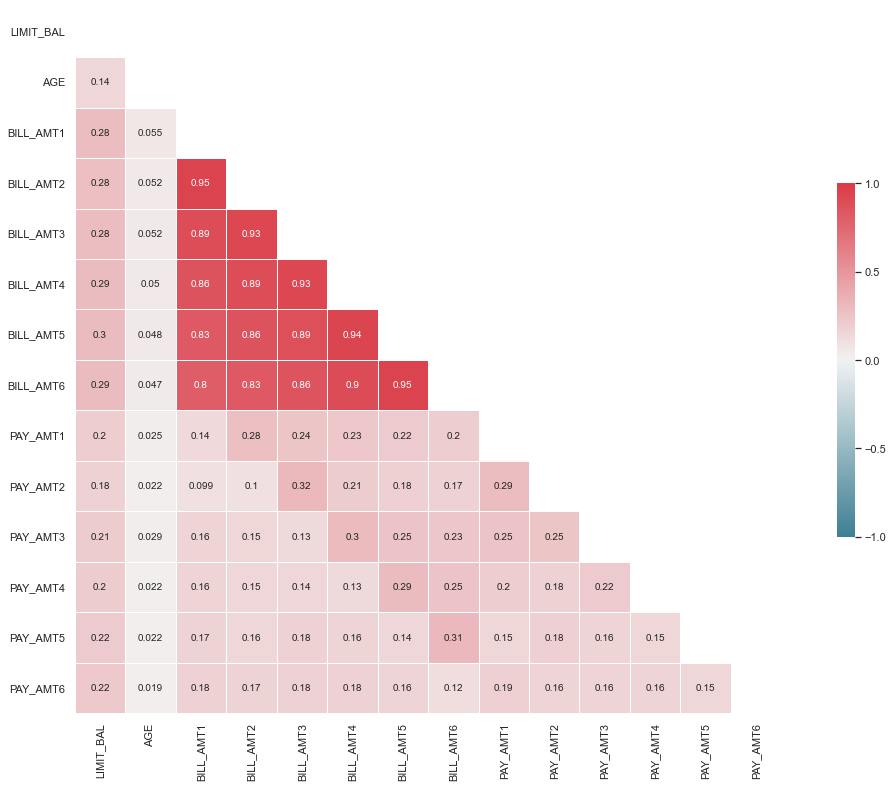

In [29]:
sns.set(style="white", font_scale=1)
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
corr = df[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

Les graphes ci-dessous montrent des coefficients de Pearson (r) qui montrent une corrélation positive (r>0)

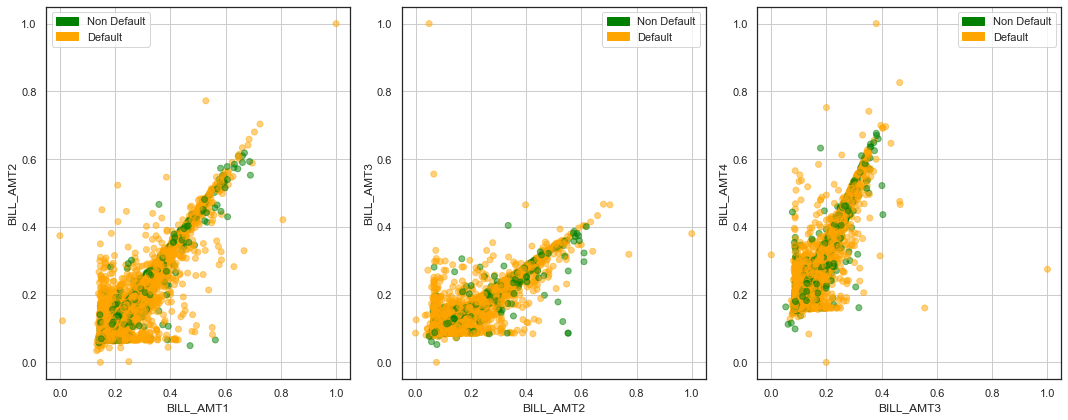

In [164]:

import matplotlib.patches as mpatches
data_np=df.to_numpy()
target=df.Default
BILL_AMT1 = df['BILL_AMT1'].to_numpy()
BILL_AMT2 = df['BILL_AMT2'].to_numpy()
BILL_AMT3 = df['BILL_AMT3'].to_numpy()
BILL_AMT4 = df['BILL_AMT4'].to_numpy()
BILL_AMT5 = df['BILL_AMT5'].to_numpy()
BILL_AMT6 = df['BILL_AMT6'].to_numpy()
AGE = df['AGE'].to_numpy()
LIMIT_BAL = df['LIMIT_BAL'].to_numpy()
PAY_AMT1 = df['PAY_AMT1'].to_numpy()

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='green', label='Non Default')
pop_b = mpatches.Patch(color='orange', label='Default')
colors=['orange', 'green']

ax[0].scatter(BILL_AMT1, BILL_AMT2, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('BILL_AMT1')
ax[0].set_ylabel('BILL_AMT2')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(BILL_AMT2, BILL_AMT3, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('BILL_AMT2')
ax[1].set_ylabel('BILL_AMT3')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(BILL_AMT3,BILL_AMT4, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('BILL_AMT3')
ax[2].set_ylabel('BILL_AMT4')
ax[2].legend(handles= [pop_a,pop_b])



plt.tight_layout()
plt.show()

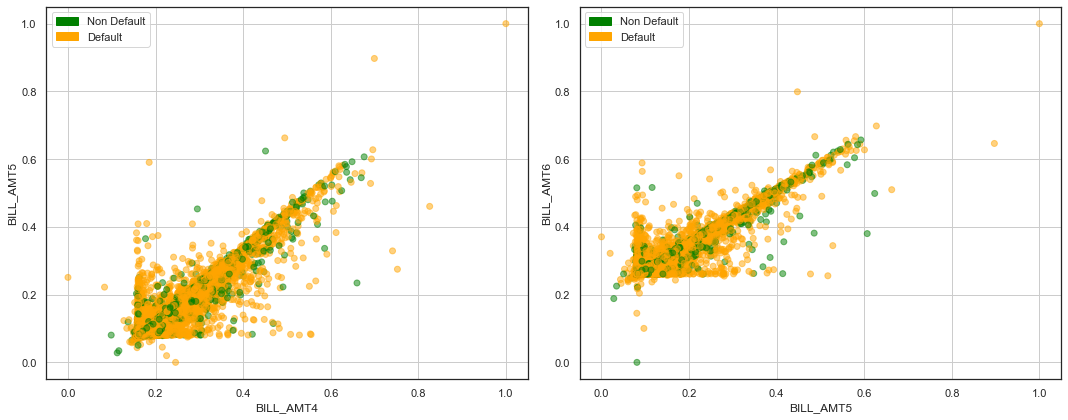

In [165]:
fig, ax = plt.subplots(1,2, figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='green', label='Non Default')
pop_b = mpatches.Patch(color='orange', label='Default')
colors=['orange', 'green']

ax[0].scatter(BILL_AMT4, BILL_AMT5, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('BILL_AMT4')
ax[0].set_ylabel('BILL_AMT5')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(BILL_AMT5, BILL_AMT6, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('BILL_AMT5')
ax[1].set_ylabel('BILL_AMT6')
ax[1].legend(handles= [pop_a,pop_b])



plt.tight_layout()
plt.show()




les graphiques des caractéristiques non fortement corrélées sont également présentés

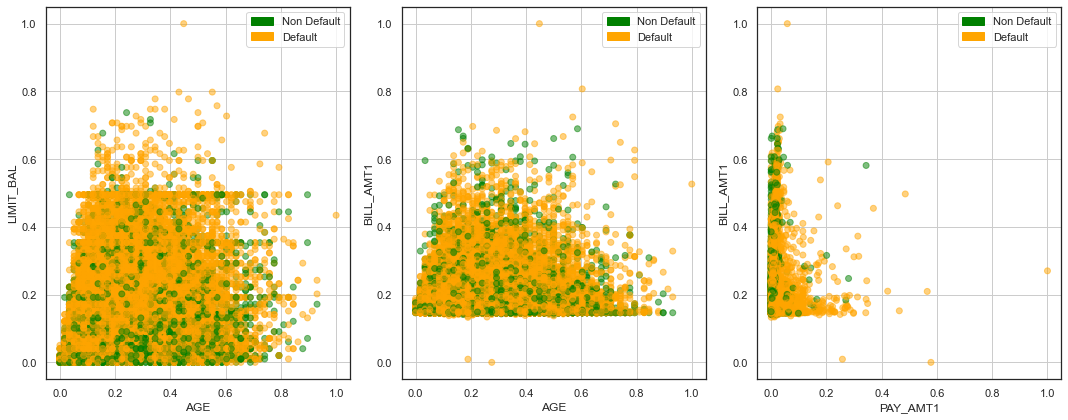

In [159]:

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='green', label='Non Default')
pop_b = mpatches.Patch(color='orange', label='Default')
colors=['orange', 'green']

ax[0].scatter(AGE, LIMIT_BAL, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('AGE')
ax[0].set_ylabel('LIMIT_BAL')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(AGE, BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('AGE')
ax[1].set_ylabel('BILL_AMT1')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(PAY_AMT1,BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('PAY_AMT1')
ax[2].set_ylabel('BILL_AMT1')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()
plt.show()

## Min Max normalization in data mining

"Feature scaling" est une méthode utilisée pour normaliser la gamme des variables indépendantes

Par example, si on dispose de plusieurs variables indépendantes telles que l'âge, le payment ; avec leurs plages respectives de (18-100 ans), (25 000-75 000 euros), la mise à l'échelle des caractéristiques les aiderait à se trouver toutes dans la même plage, par exemple centrée autour de 0 ou dans la plage (0,1) selon la technique de mise à l'échelle.

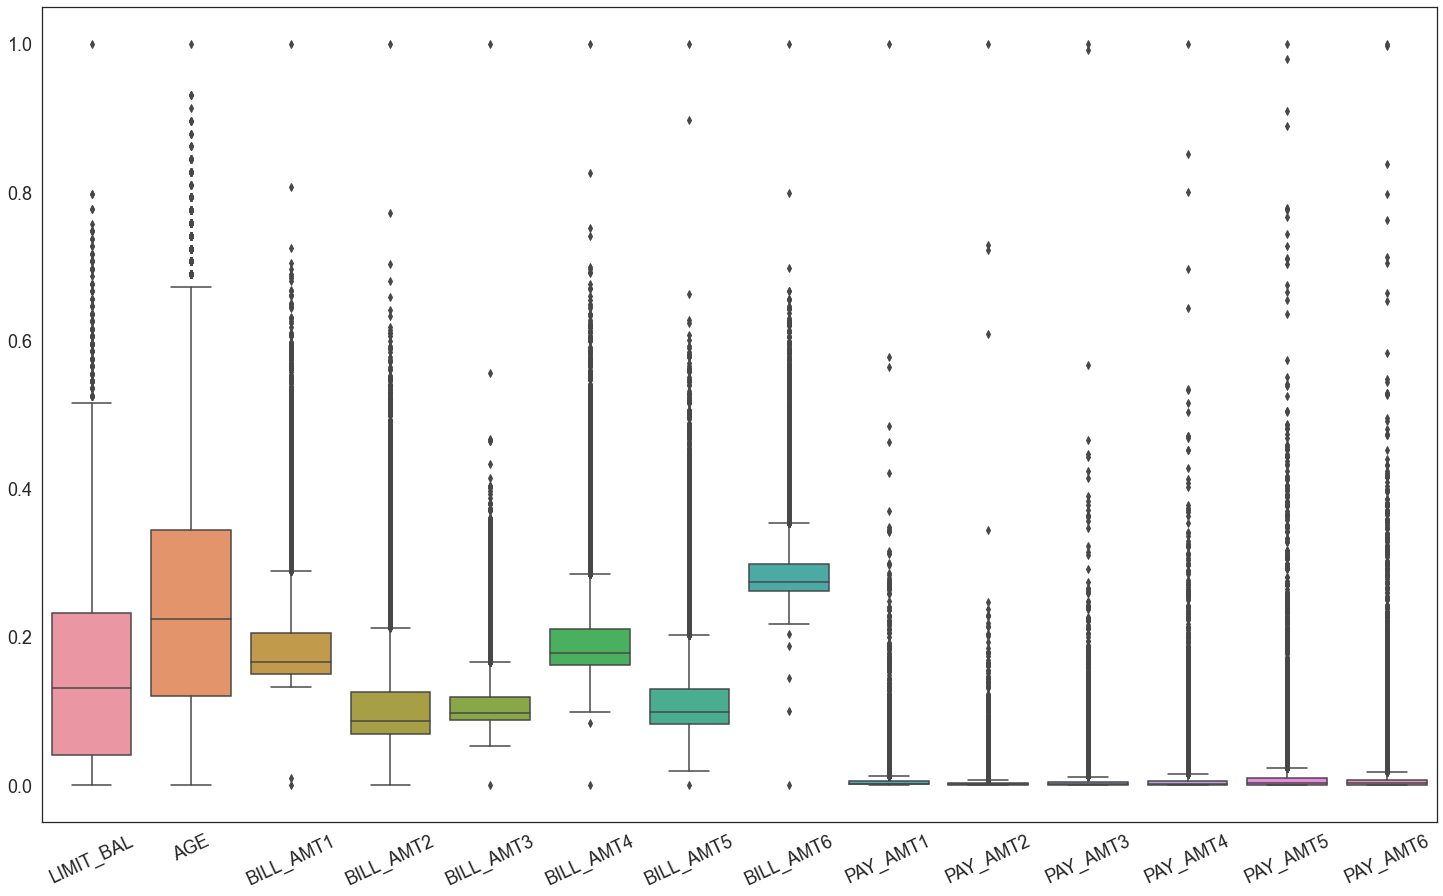

In [32]:
scaler = MinMaxScaler()
df['LIMIT_BAL'] = scaler.fit_transform(df['LIMIT_BAL'].values.reshape(-1, 1))
df['AGE'] = scaler.fit_transform(df['AGE'].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    df['PAY_' + str(i)] = scaler.fit_transform(df['PAY_' + str(i)].values.reshape(-1, 1))
for i in range(1,7):
    scaler = MinMaxScaler()
    df['BILL_AMT' + str(i)] = scaler.fit_transform(df['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    df['PAY_AMT' + str(i)] = scaler.fit_transform(df['PAY_AMT' + str(i)].values.reshape(-1, 1))
    

cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fig = plt.figure(1, figsize=(25,15))
ax = fig.add_subplot(111)
sns.boxplot(data = df[cols])
plt.xticks(np.arange(0,14), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('Fig - Boxplot')

## One hot coding

Dans notre base de donnée, on dispose 3 variables en type de category (ou nominale variable) : SEX, EDUCATION et MARRIAGE

Why using ?

De nombreux algorithmes d'apprentissage automatique ne peuvent pas fonctionner directement sur des données qualitatifs. Ils exigent que toutes les variables d'entrée et de sortie soient numériques.

This means that categorical data must be converted to a numerical form.

Il y a 2 méthode pour convertir des varibles categories en type numérique: interger encoding et one-hot coding

Pour les variables catégorielles où il n'existe pas de relation ordinale de ce type, le codage en integer encoding n'est pas suffisant. 

Dans ce cas, la variable codée en type cotegorie numérique est supprimée et une nouvelle variable binaire est ajoutée pour chaque valeur entière unique.

In [34]:

for i in ['SEX', 'EDUCATION', 'MARRIAGE']:
    df[i] = df[i].astype('category')


df = pd.concat([pd.get_dummies(df['SEX'], prefix='SEX'),
                pd.get_dummies(df['EDUCATION'], prefix='EDUCATION'), 
                pd.get_dummies(df['MARRIAGE'], prefix='MARRIAGE'),
                df],axis=1)
df.drop(['EDUCATION'],axis=1, inplace=True)
df.drop(['SEX'],axis=1, inplace=True)
df.drop(['MARRIAGE'],axis=1, inplace=True)

df.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,0,1,0,1,0,0,1,0,0,0.010101,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
2,0,1,0,1,0,0,0,1,0,0.111111,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
3,0,1,0,1,0,0,0,1,0,0.080808,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
4,0,1,0,1,0,0,1,0,0,0.040404,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
5,1,0,0,1,0,0,1,0,0,0.040404,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


In [35]:

y = df.Default     
X = df.drop('Default', axis = 1, inplace = False)

In [36]:
print(X.shape)
print("Le nombre d'observation:", X.shape[0])
print("Le nombre d'attribut:", X.shape[1])

(29601, 29)
Le nombre d'observation: 29601
Le nombre d'attribut: 29


In [227]:
FEATURE_SELECTION = False 
if FEATURE_SELECTION :
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] >= 0.92)]
    print(to_drop)
    df= df.drop(df[to_drop], axis = 1)

# Training 

Tu regardes ce lien pour mieux comprendre Accuracy, matrice de confusion

Accuracy is defined as the ability of the classifier to select all cases that need to be selected and reject all cases that need to be rejected. For a classifier with 100% accuracy, this would imply that FN=FP=0. Note that in the document search example, the TN has not been indicated, as this could be really large. Accuracy is given by (TP+TN)/(TP+FP+TN+FN). Finally, error is simply the complement of accuracy, measured by (1−accuracy).

https://www.sciencedirect.com/topics/computer-science/classification-performance

In [268]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.35, random_state= 42, stratify=y)

In [245]:

print(np.shape(X_train_val))
print(np.shape(X_test))

print("Training set:")
print(f" + Non-defaulters (y=0): {len(y_train_val[y_train_val==0])}")
print(f" + Defaulters (y=1):\t {len(y_train_val[y_train_val==1])}")

print("Test set:")
print(f" + Non-defaulters (y=0): {len(y_test[y_test==0])}")
print(f" + Defaulters (y=1):\t {len(y_test[y_test==1])}")

(19240, 29)
(10361, 29)
Training set:
 + Non-defaulters (y=0): 14947
 + Defaulters (y=1):	 4293
Test set:
 + Non-defaulters (y=0): 8049
 + Defaulters (y=1):	 2312


In [249]:
FEATURE_SELECTION = False
if FEATURE_SELECTION :
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] >= 0.92)]
    print(to_drop) 
    df = df.drop(df[to_drop], axis = 1)

In [251]:
from sklearn.decomposition import PCA

In [252]:
n_pc = 12
pca = PCA(n_components=n_pc)
pca.fit(X_train_val)
X_12d_train_val = pd.DataFrame(pca.transform(X_train_val))
X_12d_test = pd.DataFrame(pca.transform(X_test))
X_12d_train_val.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_12d_test.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_12d_train_val.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.154891,-0.682944,-0.844972,-0.034716,-0.029845,-0.026754,-0.101579,0.062362,0.027128,0.112217,-0.091606,-0.017298
1,-1.061637,-0.204213,-0.311849,-0.239810,0.087011,0.067647,-0.095184,0.047438,0.017797,-0.068896,-0.017897,-0.006699
2,0.663844,-0.862992,0.474705,-0.184949,-0.109053,-0.025377,0.028182,-0.025118,-0.090341,0.069276,-0.172915,-0.021945
3,0.155052,-0.679775,-0.855313,-0.023821,0.047848,-0.072898,-0.079742,0.044061,0.015743,0.053439,0.009887,-0.004892
4,0.145178,-0.653946,-0.901045,0.032705,0.515694,-0.048234,0.038039,-0.052232,0.042793,-0.056933,0.046732,0.005967


In [258]:
from sklearn.model_selection import StratifiedKFold

## Méthode Logistic regression


In [123]:
import sklearn.metrics as metrics

In [186]:
from sklearn.metrics import confusion_matrix

In [271]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression( )
classifier1.fit( X_train_val, y_train_val )
y_pred_1 = classifier1.predict( X_test )

cm1 = confusion_matrix( y_test, y_pred_1 )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm1[0,0] + cm1[1,1] )/len(X_test)))
scoresLR1 = cross_val_score( classifier1, X_train_val, y_train_val, cv= 10)
print("Mean LogReg CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLR1.mean(), scoresLR1.std() ))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy on Test Set for LogReg = 0.80


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean LogReg CrossVal Accuracy on Train Set 0.80, with std=0.00


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

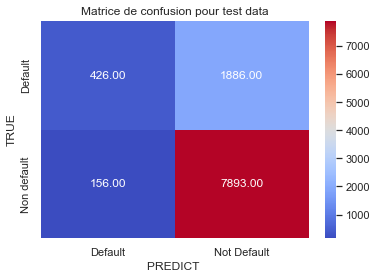

In [255]:
cm1 = metrics.confusion_matrix(y_test, y_pred_1, labels = [1,0])
sns.heatmap(cm1, annot = True, fmt = ".2f", cmap = "coolwarm", xticklabels = ["Default", "Not Default"],
           yticklabels = ["Default", "Non default"])
plt.title("Matrice de confusion pour test data")
plt.ylabel("TRUE")
plt.xlabel("PREDICT ")
plt.show()

In [248]:
print(classification_report(y_test,y_pred_1 ))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      8049
           1       0.73      0.18      0.29      2312

    accuracy                           0.80     10361
   macro avg       0.77      0.58      0.59     10361
weighted avg       0.79      0.80      0.75     10361



L'AUC est l'aire sous la courbe du taux False Positive par rapport au taux de True Positive à différents points dans [0, 1].

Comme il est évident, l'AUC a une plage de [0, 1]. Plus la valeur est grande, meilleure est la performance de notre modèle.

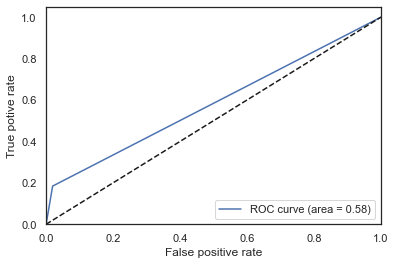

In [169]:
auc_score1 = metrics.roc_auc_score(y_test,y_pred_1)
round(auc_score1, 4)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_1, drop_intermediate = False)
plt.plot(fpr, tpr, label = "ROC curve (area = %0.2f)" % auc_score1)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True potive rate')
plt.legend(loc = "lower right")
plt.show()

# Modèle random forest

In [79]:
from sklearn.model_selection import cross_val_score

In [297]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 90, criterion = "entropy")
classifier2.fit( X_train_val, y_train_val )
y_pred_2 = classifier2.predict( X_test )

cm2 = metrics.confusion_matrix( y_test, y_pred_2 )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm2[0,0] + cm2[1,1] )/len(X_test)))
scoresRF2 = cross_val_score( classifier2, X_train_val, y_train_val, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF2.mean(), scoresRF2.std() ))

Accuracy on Test Set for RandomForest = 0.82
Mean RandomForest CrossVal Accuracy on Train Set 0.81, with std=0.01


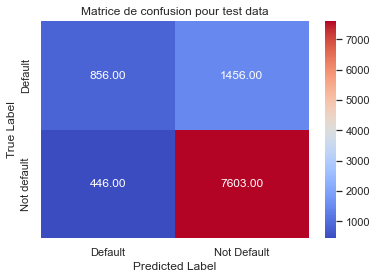

In [299]:
cm2 = metrics.confusion_matrix(y_test, y_pred_2, labels = [1,0])
cm2
sns.heatmap(cm2, annot = True, fmt = ".2f", cmap = "coolwarm", xticklabels = ["Default", "Not Default"],
           yticklabels = ["Default", "Not default"])
plt.title("Matrice de confusion pour test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [300]:
print(classification_report(y_test,y_pred_2 ))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      8049
           1       0.66      0.37      0.47      2312

    accuracy                           0.82     10361
   macro avg       0.75      0.66      0.68     10361
weighted avg       0.80      0.82      0.80     10361



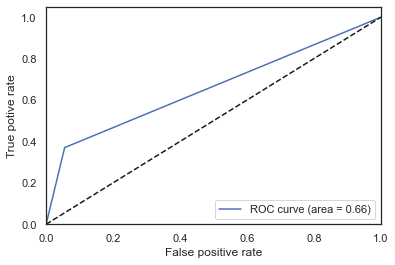

In [301]:
auc_score2 = metrics.roc_auc_score(y_test,y_pred_2)
round(auc_score2, 4)
fpr2, tpr2, thresholds = metrics.roc_curve(y_test,y_pred_2, drop_intermediate = False)
plt.plot(fpr2, tpr2, label = "ROC curve (area = %0.2f)" % auc_score2)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True potive rate')
plt.legend(loc = "lower right")
plt.show()

# Neural Network

In [310]:
from sklearn.neural_network import MLPClassifier
classifier3 = MLPClassifier(max_iter=300, random_state = 42)
classifier3.fit( X_train_val, y_train_val )
y_pred_3 = classifier3.predict( X_test )

cm3 = metrics.confusion_matrix( y_test, y_pred_3 )
print("Accuracy on Test Set for Neural network = %.2f" % ((cm3[0,0] + cm3[1,1] )/len(X_test)))
scoresLR3 = cross_val_score( classifier3, X_train_val, y_train_val, cv=10)
print("Mean Neural Network CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLR3.mean(), scoresLR3.std() ))

Accuracy on Test Set for Neural network = 0.82
Mean Neural Network CrossVal Accuracy on Train Set 0.81, with std=0.01


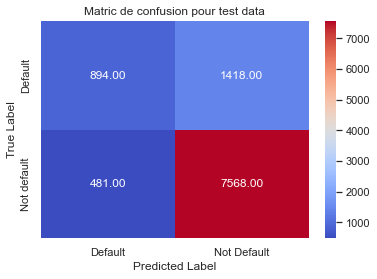

In [305]:
cm_neural = metrics.confusion_matrix(y_test, y_pred_3, labels = [1,0])
cm_neural
sns.heatmap(cm_neural, annot = True, fmt = ".2f", cmap = "coolwarm", xticklabels = ["Default", "Not Default"],
           yticklabels = ["Default", "Not default"])
plt.title("Matric de confusion pour test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [308]:
print(classification_report(y_test,y_pred_3 ))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      8049
           1       0.65      0.39      0.48      2312

    accuracy                           0.82     10361
   macro avg       0.75      0.66      0.69     10361
weighted avg       0.80      0.82      0.80     10361



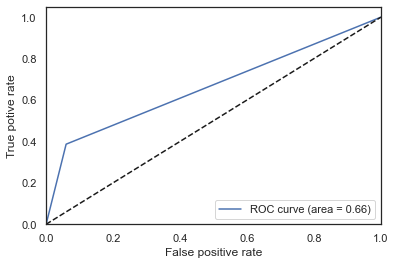

In [307]:
auc_score3 = metrics.roc_auc_score(y_test,y_pred_3)
round(auc_score3, 4)
fpr3, tpr3, thresholds = metrics.roc_curve(y_test,y_pred_3, drop_intermediate = False)
plt.plot(fpr3, tpr3, label = "ROC curve (area = %0.2f)" % auc_score3)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True potive rate')
plt.legend(loc = "lower right")
plt.show()

# Kernel SVM

clustering methode , non supervisé

In [309]:
from sklearn.svm import SVC
classifier4 = SVC(kernel="rbf")
classifier4.fit( X_train_val, y_train_val )
y_pred_4 = classifier4.predict( X_test )

cm4 = metrics.confusion_matrix( y_test, y_pred_4 )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm4[0,0] + cm4[1,1] )/len(X_test)))
scoresSVC4 = cross_val_score( classifier4, X_train_val, y_train_val, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC4.mean(), scoresSVC4.std() ))

Accuracy on Test Set for kernel-SVM = 0.81
Mean kernel-SVM CrossVal Accuracy on Train Set 0.81, with std=0.00


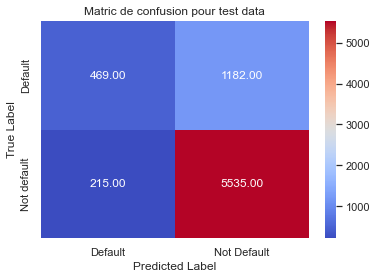

In [99]:
cm_svc = metrics.confusion_matrix(y_test, y_pred_4, labels = [1,0])
cm_svc
sns.heatmap(cm_svc, annot = True, fmt = ".2f", cmap = "coolwarm", xticklabels = ["Default", "Not Default"],
           yticklabels = ["Default", "Not default"])
plt.title("Matric de confusion pour test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [100]:
print(classification_report(y_test,y_pred_4 ))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5750
           1       0.69      0.28      0.40      1651

    accuracy                           0.81      7401
   macro avg       0.75      0.62      0.64      7401
weighted avg       0.79      0.81      0.78      7401



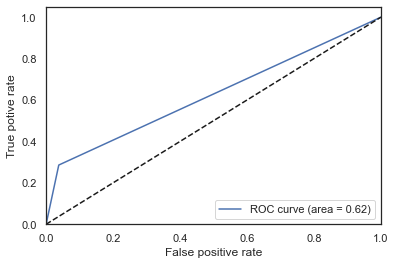

In [151]:
auc_score4 = metrics.roc_auc_score(y_test,y_pred_4)
round(auc_score4, 4)
fpr4, tpr4, thresholds = metrics.roc_curve(y_test,y_pred_4, drop_intermediate = False)
plt.plot(fpr4, tpr4, label = "ROC curve (area = %0.2f)" % auc_score4)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True potive rate')
plt.legend(loc = "lower right")
plt.show()

In [183]:
err1 = np.array([])
err2= np.array([])
auc1= np.array([])
auc2= np.array([])

In [194]:
from sklearn.ensemble import GradientBoostingClassifier

In [195]:
classifier5 = GradientBoostingClassifier()
classifier5.fit( X_train_val, y_train_val )
y_pred_5 = classifier5.predict( X_test )

cm5 = metrics.confusion_matrix( y_test, y_pred_5 )
print("Accuracy on Test Set = %.2f" % ((cm5[0,0] + cm5[1,1] )/len(X_test)))
scoresSVC5 = cross_val_score( classifier5, X_train_val, y_train_val, cv=10)
print("Mean CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC4.mean(), scoresSVC4.std() ))

Accuracy on Test Set for kernel-SVM = 0.82
Mean kernel-SVM CrossVal Accuracy on Train Set 0.81, with std=0.00


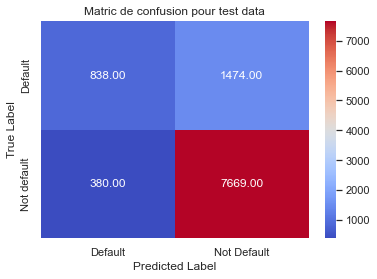

In [197]:
cm_svc2 = metrics.confusion_matrix(y_test, y_pred_5, labels = [1,0])

sns.heatmap(cm_svc2, annot = True, fmt = ".2f", cmap = "coolwarm", xticklabels = ["Default", "Not Default"],
           yticklabels = ["Default", "Not default"])
plt.title("Matric de confusion pour test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

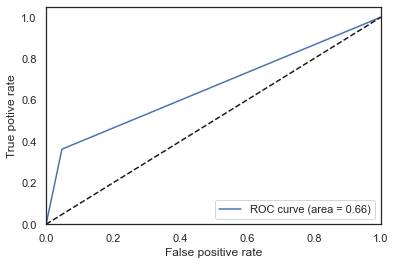

In [198]:
auc_score5 = metrics.roc_auc_score(y_test,y_pred_5)
round(auc_score5, 4)
fpr5, tpr5, thresholds = metrics.roc_curve(y_test,y_pred_5, drop_intermediate = False)
plt.plot(fpr5, tpr5, label = "ROC curve (area = %0.2f)" % auc_score5)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True potive rate')
plt.legend(loc = "lower right")
plt.show()

In [272]:
from sklearn.cluster import KMeans

In [286]:
classifier5 = KMeans(n_clusters=1, random_state=3)
classifier5.fit( X_train_val, y_train_val )
y_pred_5 = classifier5.predict( X_test )

cm5 = metrics.confusion_matrix( y_test, y_pred_5 )
print("Accuracy on Test Set for Kmeans = %.2f" % ((cm5[0,0] + cm5[1,1] )/len(X_test)))
scores5 = cross_val_score( classifier5, X_train_val, y_train_val, cv=10)
print("Mean Kmeans CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC5.mean(), scoresSVC5.std() ))

Accuracy on Test Set for Kmeans = 0.78
Mean Kmeans CrossVal Accuracy on Train Set 0.82, with std=0.01
